In [ ]:
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt

In [ ]:
#Adatok
d=0.02
ro=7800
tomeg=0.1
e=0.4
l1=0.2
l2=0.1
l3=0.15
l4=0.3
k1=56
k2=105
kt=10
c1=4
r0=0.04
omega=25
g=9.81

In [ ]:
#Tehetetlenségi nyomaték A-ra
mf=(l1+l2)*(pow(d,2)*np.pi*ro)/4
print(mf)
mv=(l3+l4)*(pow(d,2)*np.pi*ro)/4
print(mv)
x, y, c= sp.symbols('x y c')
t, z, m,k=sp.symbols('t z m k')

tehnyomexp=c*(pow(x+y,2)/12+pow((x+y)/2,2))
tehnyom1=tehnyomexp.subs(c,mf).subs(x,l1).subs(y,l2)
tehnyom2=tehnyomexp.subs(c,mv).subs(x,l3).subs(y,l4)
tehnyoma=tehnyom1+tehnyom2
tehnyoma

0.7351326809400117
1.1026990214100172


0.0964861643733765

In [ ]:
csillapitas=c*(x+y)*z
csillapitas

c*z*(x + y)

In [ ]:
#Sajátkörfrekvencia és relatív csillapítás
sajatfrekv=((t*k)/(t+k)*pow(x,2)-m*g*((x+y)/2)+z)/tehnyoma
print(sajatfrekv)
sajatfrekvencia=math.sqrt(sajatfrekv.subs(t,k1).subs(k,k2).subs(m,mf).subs(x,l1).subs(y,l2).subs(z,kt))
print(sajatfrekvencia)
relcsill=c*pow(x+y,2)/2*sajatfrekvencia*tehnyoma
relativcsillapitas=relcsill.subs(c,c1).subs(x,l1).subs(y,l2)
relativcsillapitas

10.3641802583245*k*t*x**2/(k + t) - 101.672608334163*m*(x/2 + y/2) + 10.3641802583245*z
10.371648351136354


0.180129702173508

In [ ]:
#Grafikonrol olvasas
lamb=(1/x)*sp.log(c/y)
csill_lambd_graf=lamb.subs(x,3).subs(c,1).subs(y,0.03)
print(f'A lambda: {csill_lambd_graf}')
csill_tenyezo_graf=c/sp.sqrt(4*pow(math.pi,2)+pow(c,2))
csill_tenyezo_graf=csill_tenyezo_graf.subs(c,csill_lambd_graf)
print(f'A csillapitasi tenyezo: {csill_tenyezo_graf}')
periodus_ido_graf=1.85/3
print(f'A periodus ido: {periodus_ido_graf}')
csillapitott_korfrekv_graf=2*math.pi/periodus_ido_graf
print(f'A csillapitott sajatkorfrekvencia: {csillapitott_korfrekv_graf}')
csillapitatlan_korfrekv_graf=csillapitott_korfrekv_graf/math.sqrt(1-pow(csill_tenyezo_graf,2))
print(f'A csillapitatlan sajatkorfrekvencia: {csillapitatlan_korfrekv_graf}')

A lambda: 1.16885263243999
A csillapitasi tenyezo: 0.182890966278272
A periodus ido: 0.6166666666666667
A csillapitott sajatkorfrekvencia: 10.188949146777707
A csillapitatlan sajatkorfrekvencia: 10.363752457680713


In [ ]:
#Ütközés
redukalt_tomeg=tehnyoma/pow(l3+l4,2)
print(f'A redukalt tomeg: {redukalt_tomeg}')
golyo_seb_utk_elott=-math.sqrt(2*g*l1)
print(f'A golyo utkozes elotti sebessege: {golyo_seb_utk_elott}')
kozossp_seb_normal=golyo_seb_utk_elott*tomeg/(tomeg+redukalt_tomeg)
print(f'A kozos sulypont normalis iranyu sebesseg komponense: {kozossp_seb_normal}')
talppont_seb_utk_utan=kozossp_seb_normal+e*kozossp_seb_normal
print(f'A talppont utkozes utani sebessge: {talppont_seb_utk_utan}')
talppont_szogseb=talppont_seb_utk_utan/(l3+l4)
print(f'A talppont szogsebessege: {talppont_szogseb}')
print('\nA kezdeti feltetlek:')
print('fi(0)=0')
print(f'fipont(0)={talppont_szogseb}')

A redukalt tomeg: 0.476474885794452
A golyo utkozes elotti sebessege: -1.9809088823063015
A kozos sulypont normalis iranyu sebesseg komponense: -0.343624489309082
A talppont utkozes utani sebessge: -0.481074285032715
A talppont szogsebessege: -1.06905396673937

A kezdeti feltetlek:
fi(0)=0
fipont(0)=-1.06905396673937


In [ ]:
#Differencial egyenletek felirasa es a partikularis megoldas felirasa
csillapitottkorfrekv=sajatfrekvencia*math.sqrt(1-pow(relativcsillapitas,2))
print(f'A csillapitott sajatkorfrekvencia: {csillapitottkorfrekv}')
homogen=pow(math.e,-relativcsillapitas*sajatfrekvencia*t)*(x*sp.cos(csillapitottkorfrekv*t)+y*sp.sin(csillapitottkorfrekv*t))
A=sp.symbols('A')
partikularis=A*sp.sin(omega*t-x)
frekvencia_hanyados=omega/sajatfrekvencia
print(f'A frekvencia hanyados: {frekvencia_hanyados}')
nagyitas=1/math.sqrt(pow(1-pow(frekvencia_hanyados,2),2)+4*pow(relativcsillapitas,2)*pow(frekvencia_hanyados,2))
print(f'A nagyitas: {nagyitas}')
keredo=k1*k2/(k1+k2)
print(f'Az eredo rugomerevseg: {keredo}')
statikus_def=keredo*l1*r0/(pow(sajatfrekvencia,2)*tehnyoma)
print(f'A statikus deformacio: {statikus_def}')
amplitudo=nagyitas*statikus_def
print(f'A gerjesztett rezges amplitudoja: {amplitudo}')
faziseltolas=math.atan(2*relativcsillapitas*frekvencia_hanyados/(1-pow(frekvencia_hanyados,2)))+math.pi
print(f'A faziseltolas: {faziseltolas}')
partikularis_megoldas=partikularis.subs(A,amplitudo).subs(x,faziseltolas)
partikularis_megoldas

A csillapitott sajatkorfrekvencia: 10.201997922763953
A frekvencia hanyados: 2.410417240694524
A nagyitas: 0.20458820685484538
Az eredo rugomerevseg: 36.52173913043478
A statikus deformacio: 0.0281501573990292
A gerjesztett rezges amplitudoja: 0.00575919022494905
A faziseltolas: 2.9629851695975757


0.00575919022494905*sin(25*t - 2.96298516959758)

In [ ]:
#Inhomogen + kezdeti ertek problemna megoldása
mozgase=homogen+partikularis
C1=-amplitudo*sp.sin(-faziseltolas)
print(f'A C1 konstans: {C1}')
C2=(talppont_szogseb+relativcsillapitas*sajatfrekvencia*C1-amplitudo*omega*sp.cos(-faziseltolas))/csillapitottkorfrekv
print(f'A C2 konstans: {C2}')
homogen_megoldas=homogen.subs(x,C1).subs(y,C2)
mozgasegyenlet=homogen_megoldas+partikularis_megoldas
mozgasegyenlet

A C1 konstans: 0.00102317417733131
A C2 konstans: -0.0907129275426123


0.00575919022494905*sin(25*t - 2.96298516959758) + (-0.0907129275426123*sin(10.201997922764*t) + 0.00102317417733131*cos(10.201997922764*t))/2.71828182845905**(1.86824192853855*t)

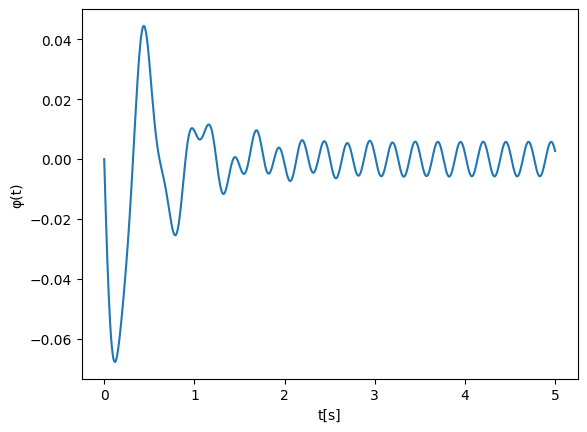

In [ ]:
#Grafikon
def plot():
  x=[]
  y=[]
  i=0
  j=0
  while j<5:
    x.append(j)
    y.append(mozgasegyenlet.subs(t,x[i]))
    #print(y)
    #plt.plot(x,y)
    i+=1
    j+=0.005
  plt.xlabel('t[s]')
  plt.ylabel('φ(t)')
  plt.plot(x,y)
  plt.show()

plot()